<a href="https://colab.research.google.com/github/vimukthijayasanka/Cat-Dog-Classifier-CNN-/blob/main/cat_dog_classifier_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [ ]:
!pip install opendatasets

In [ ]:
import opendatasets as od

In [ ]:
data = od.download('https://www.kaggle.com/datasets/dineshpiyasamara/cats-and-dogs-for-classification')

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: vimjayasanka
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/dineshpiyasamara/cats-and-dogs-for-classification


100%|██████████| 217M/217M [00:03<00:00, 62.0MB/s]


In [ ]:
BATCH_SIZE = 32
IMG_SIZE = (128, 128)

In [ ]:
train_data_dir = "/content/cats-and-dogs-for-classification/cats_dogs/train"
test_data_dir = "/content/cats-and-dogs-for-classification/cats_dogs/test"

In [ ]:
train_data = tf.keras.utils.image_dataset_from_directory(
    train_data_dir,
    batch_size=BATCH_SIZE,
    image_size=IMG_SIZE,
    subset='training',
    validation_split=0.1,
    seed=42)

validation_data = tf.keras.utils.image_dataset_from_directory(
    train_data_dir,
    batch_size=BATCH_SIZE,
    image_size=IMG_SIZE,
    subset='validation',
    validation_split=0.1,
    seed=42
)

test_data = tf.keras.utils.image_dataset_from_directory(
    test_data_dir,
    batch_size=BATCH_SIZE,
    image_size=IMG_SIZE,
)

Found 8000 files belonging to 2 classes.
Using 7200 files for training.
Found 8000 files belonging to 2 classes.
Using 800 files for validation.
Found 2000 files belonging to 2 classes.


In [ ]:
class_names = train_data.class_names
class_names

['cats', 'dogs']

In [ ]:
for image_batch,label_batch in train_data.take(1):
  print(image_batch.shape)
  print(label_batch.shape)


(32, 128, 128, 3)
(32,)


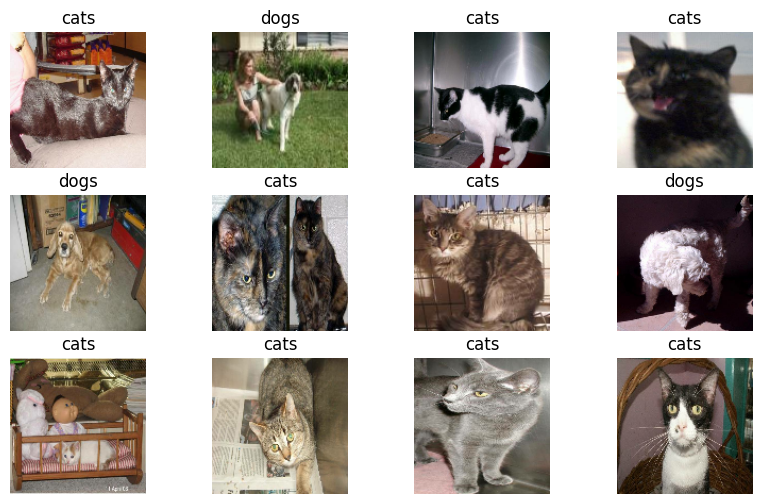

In [ ]:
plt.figure(figsize=(10, 6))
for image,label in train_data.take(1):
  for i in range(12):
    ax = plt.subplot(3, 4, i + 1)
    plt.imshow(image[i].numpy().astype("uint8"))
    plt.title(class_names[label[i]])
    plt.axis("off")

# Data Preprocessing

In [ ]:
for image,label in train_data.take(1):
  for i in range (1):
    print(image)

tf.Tensor(
[[[[101.00769   104.00769   109.00769  ]
   [111.074585  112.71521   114.30505  ]
   [117.635284  115.31354   112.59396  ]
   ...
   [129.86246   132.91324   136.22964  ]
   [126.8725    133.10297   135.69281  ]
   [128.9002    138.99207   139.94614  ]]

  [[ 85.20029    88.20029    93.20029  ]
   [ 99.3725     99.79227   101.78906  ]
   [114.00287   112.997925  110.048706 ]
   ...
   [116.720825  120.720825  123.720825 ]
   [119.9389    126.16937   128.75922  ]
   [138.79547   147.0824    148.93893  ]]

  [[ 92.54297    94.90234    99.58203  ]
   [ 91.57605    91.986206   93.986206 ]
   [105.38388   104.38388   101.75107  ]
   ...
   [120.73743   125.52237   128.52237  ]
   [130.21445   135.21445   138.21445  ]
   [127.32648   134.36554   136.68585  ]]

  ...

  [[118.07504   122.07504   125.07504  ]
   [121.617584  125.617584  128.61758  ]
   [130.54602   134.54602   137.54602  ]
   ...
   [ 81.51825    87.02301    96.76108  ]
   [ 45.951294   50.819916   54.147003 ]
   [ 

In [ ]:
train_data = train_data.map(lambda x,y:(x/255,y))
validation_data = validation_data.map(lambda x,y:(x/255,y))
test_data = test_data.map(lambda x,y:(x/255,y))

#Transfer Learning

In [ ]:
pretrained_model = tf.keras.applications.xception.Xception(include_top=False,
                                                  input_shape=(128,128,3),
                                                  weights='imagenet',
                                                  pooling='max')

for layer in pretrained_model.layers:
  layer.trainable = False


#Model Building

In [ ]:
model = tf.keras.models.Sequential()

model.add(pretrained_model)
model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(units=128,activation='relu'))
model.add(tf.keras.layers.Dense(units=128,activation='relu'))
model.add(tf.keras.layers.Dense(units=32,activation='relu'))
model.add(tf.keras.layers.Dense(units=1,activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 xception (Functional)       (None, 2048)              20861480  
                                                                 
 flatten_1 (Flatten)         (None, 2048)              0         
                                                                 
 dense_4 (Dense)             (None, 128)               262272    
                                                                 
 dense_5 (Dense)             (None, 128)               16512     
                                                                 
 dense_6 (Dense)             (None, 32)                4128      
                                                                 
 dense_7 (Dense)             (None, 1)                 33        
                                                                 
Total params: 21144425 (80.66 MB)
Trainable params: 28

In [ ]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)


#Model Training

In [ ]:
import time
start_time = time.time()

history = model.fit(train_data,
                    epochs=3,
                    validation_data=validation_data)

end_time = time.time()

Epoch 1/3
225/225 [==============================] - 631s 3s/step - loss: 0.1599 - accuracy: 0.9340 - val_loss: 0.1086 - val_accuracy: 0.9588
Epoch 2/3
225/225 [==============================] - 580s 3s/step - loss: 0.1130 - accuracy: 0.9526 - val_loss: 0.1140 - val_accuracy: 0.9575
Epoch 3/3
225/225 [==============================] - 585s 3s/step - loss: 0.0991 - accuracy: 0.9613 - val_loss: 0.1006 - val_accuracy: 0.9650


In [ ]:
print(f'Total time for training {(end_time-start_time):.3f} seconds')

Total time for training 1893.792 seconds


#Performance Analaysis

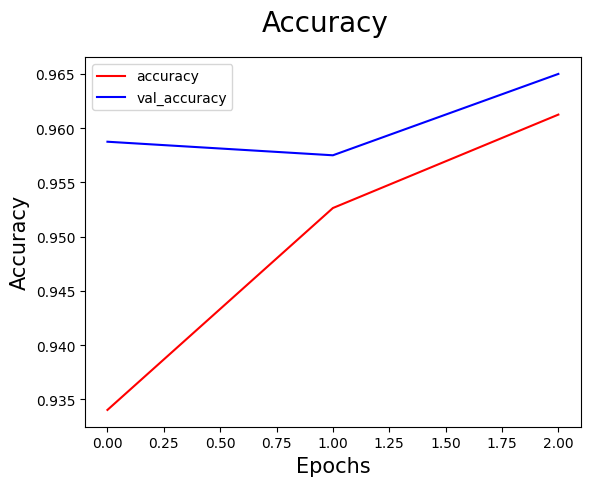

In [ ]:
fig =plt.figure()
plt.plot(history.history['accuracy'],color='red',label='accuracy')
plt.plot(history.history['val_accuracy'],color='blue',label='val_accuracy')
plt.suptitle('Accuracy',fontsize=20)
plt.xlabel('Epochs',fontsize=15)
plt.ylabel('Accuracy',fontsize=15)
plt.legend()
plt.show()

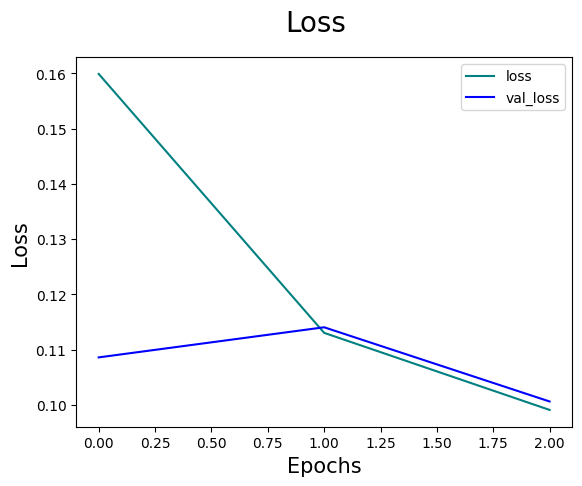

In [ ]:
fig =plt.figure()
plt.plot(history.history['loss'],color='teal',label='loss')
plt.plot(history.history['val_loss'],color='blue',label='val_loss')
plt.suptitle('Loss',fontsize=20)
plt.xlabel('Epochs',fontsize=15)
plt.ylabel('Loss',fontsize=15)
plt.legend()
plt.show()

#Model Evaluvation

In [ ]:
precision = tf.keras.metrics.Precision()
recall = tf.keras.metrics.Recall()
accuracy = tf.keras.metrics.BinaryAccuracy()

In [ ]:
for batch in test_data.as_numpy_iterator():
  X,y = batch
  y_pred = model.predict(X)
  precision.update_state(y,y_pred)
  recall.update_state(y,y_pred)
  accuracy.update_state(y,y_pred)

1/1 [==============================] - 2s 2s/step


In [ ]:
precision.result()

<tf.Tensor: shape=(), dtype=float32, numpy=0.9495549>

In [ ]:
recall.result()

<tf.Tensor: shape=(), dtype=float32, numpy=0.96>

In [ ]:
accuracy.result()

<tf.Tensor: shape=(), dtype=float32, numpy=0.9545>

In [ ]:
import cv2

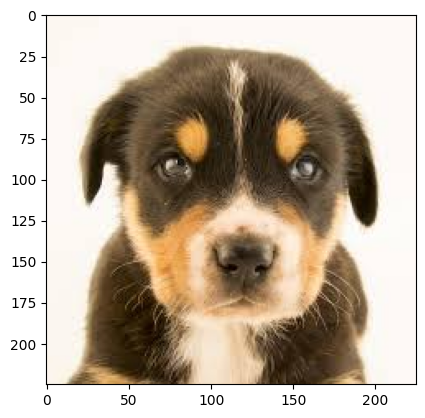

In [ ]:
image = cv2.imread("/content/unknow_2.jpeg")
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB)) #if cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.show()

In [ ]:
resized_image = tf.image.resize(image,IMG_SIZE)
scaled_image = resized_image/255

In [ ]:
scaled_image

<tf.Tensor: shape=(128, 128, 3), dtype=float32, numpy=
array([[[0.94509804, 0.96862745, 0.9882353 ],
        [0.94509804, 0.96862745, 0.9882353 ],
        [0.94509804, 0.96862745, 0.9882353 ],
        ...,
        [0.9647059 , 0.9764706 , 0.99607843],
        [0.9647059 , 0.9764706 , 0.99607843],
        [0.9647059 , 0.9764706 , 0.99607843]],

       [[0.94509804, 0.96862745, 0.9882353 ],
        [0.94509804, 0.96862745, 0.9882353 ],
        [0.94509804, 0.96862745, 0.9882353 ],
        ...,
        [0.9647059 , 0.9764706 , 0.99607843],
        [0.9647059 , 0.9764706 , 0.99607843],
        [0.9647059 , 0.9764706 , 0.99607843]],

       [[0.94509804, 0.96862745, 0.9882353 ],
        [0.94509804, 0.96862745, 0.9882353 ],
        [0.94509804, 0.96862745, 0.9882353 ],
        ...,
        [0.9647059 , 0.9764706 , 0.99607843],
        [0.9647059 , 0.9764706 , 0.99607843],
        [0.9647059 , 0.9764706 , 0.99607843]],

       ...,

       [[0.94509804, 0.95686275, 0.9882353 ],
        [0.93

In [ ]:
expand_image = np.expand_dims(scaled_image,axis=0)

In [ ]:
y_pred = model.predict(expand_image)

1/1 [==============================] - 0s 103ms/step


In [ ]:
y_pred

array([[0.9993892]], dtype=float32)

In [ ]:
if y_pred < 0.5:
  print("Cat")
else:
  print("Dog")

Dog


In [ ]:
model.save('cats_dogs.keras')